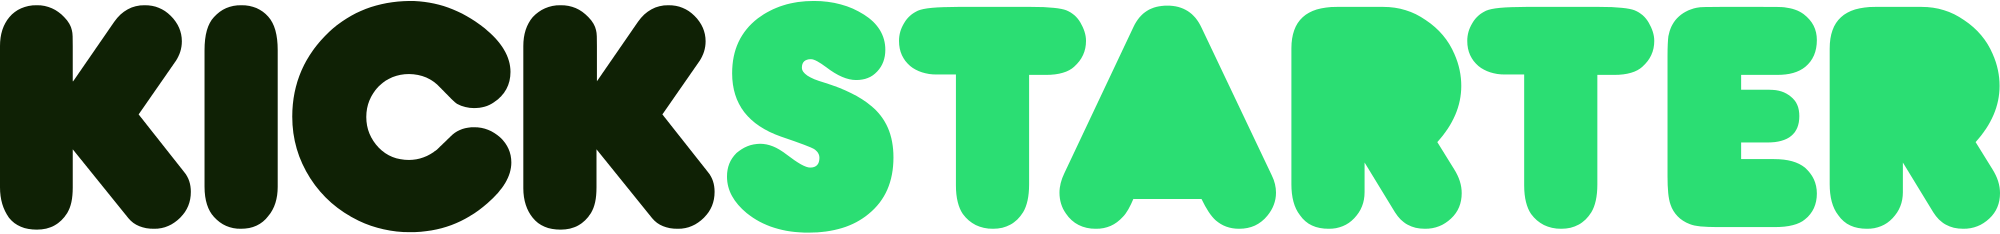

# Project Overview

Our project seeks to build a model that calculates the probability of a Kickstarter project’s success based upon the properties of the project.  In order to construct this model, we will consider the amount of money pledged, the preparation period and total duration of the project, the number of project backers, and the month, day, and year the project was launched. In our second iteration, we may also examine the project title and description to determine if the words used to describe the project have any significant impact on its success. 
	
We will build this model by cleaning and utilizing data from a csv file dataset we obtained from https://data.world, and performing linear regression analyses for each individual attribute of the project. Each attribute will be considered the dependent variable (y axis) in our analyses, and the maximum capacity of the fuel engine will be the independent variable (x axis). 
	
A positive correlation coefficient indicates that the dependent variable likely has a positive contribution to the success of the project, while a negative correlation coefficient indicates the the dependent variable likely has a negative contribution to the success of the project. The closer the correlation coefficient is to zero, the less contribution that particular variable makes. 
	
We hypothesize that the amount of funding behind a project (dollars raised) will be the most significant indicator of its likelihood of success. We are, in part, basing this prediction off of Professor Skiena’s contention that “The average dollar is smarter than the average person.” In other words, looking at what money is being invested in can often tell you a lot about outcomes. 


In [1]:
import pandas as pd
%matplotlib inline
#import pylab as plt
import numpy as np
import scipy as sc
import scipy.stats
import matplotlib.pyplot as plt

# Data Sources and Rationale

For our first iteration, we obtained our data without writing any code. Rather, we downloaded a csv file from https://data.world. We decided to use this dataset because it contains the exact set of data we need in a comprehensible format.  The data we obtained from  https://data.world is going to help us construct our predictive model by providing us with the project statistics we require procure thorough, accurate conclusions.

We also wrote a web scraper, which we will utilize to obtain data for our second iteration. 
The web scraper obtains data specifically about “popular projects” from the kickstarter website. This will help us perform more in-depth analyses on projects that gain the most funding and attention.


In [2]:
df = pd.read_csv('./kickstarter_data_full.csv', sep=',')
df.head()

c:\users\neel\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


# Data Cleaning

The data was originally in spreadsheet format on the website that needed to be downloaded and converted to CSV format. After converting it to this format, our first step was to rename certain columns and delete ones that were unnecessary for our experiment. This step left us with columns that were directly relevant to our experiment.  
Our data cleaning plan was to take the data in that format and standardize units as well as convert numbers in string form into float form. Most importantly, we converted the column for determining whether a project succeeded, failed, or got cancelled into a numerical form so it could be graphed and the dependent variables compared. By having these numbers for project success as the x-axis for our graphs, we could create linear regressions for each variable to determine what their effect was on this percentage.
 


In [3]:
df = df.drop(['photo', 'blurb', 'slug', 'disable_communication', 'currency_symbol', 
              'currency_trailing_code', 'USorGB', 'TOPCOUNTRY', 'deadline', 'blurb_len_clean', 'state_changed_at_weekday', 
             'deadline_day', 'deadline_hr', 'LaunchedTuesday', 'DeadlineWeekend', 'SuccessfulBool', 
              'launch_to_deadline_days', 'launch_to_state_change', 'create_to_launch', 'launched_at_hr'], axis=1)
df.head()


,Unnamed: 0,id,name,goal,pledged,state,country,currency,state_changed_at,created_at,...,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launch_to_deadline,create_to_launch_days,launch_to_state_change_days
0,0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,failed,US,USD,2015-01-23 10:35:00,2014-11-29 22:55:57,...,11,29,2014,22,12,17,2014,36 days 20:47:24.000000000,17,36
1,1,1655206086,Jump Start Kindergarten Toolkit,500.0,0.0,failed,US,USD,2015-05-01 16:13:24,2015-02-20 09:28:43,...,2,20,2015,9,3,2,2015,60 days 00:00:00.000000000,10,60
2,2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,120.0,failed,US,USD,2015-03-26 08:17:05,2015-01-24 00:08:06,...,1,24,2015,0,1,25,2015,60 days 00:00:00.000000000,1,60
3,3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,0.0,failed,US,USD,2014-10-06 00:41:17,2014-09-05 22:30:00,...,9,5,2014,22,9,6,2014,30 days 00:00:00.000000000,0,30
4,4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,356.0,failed,DE,EUR,2016-06-27 12:00:00,2016-05-25 14:09:49,...,5,25,2016,14,5,26,2016,32 days 06:02:33.000000000,0,32


In [4]:
df = df.rename(index=str, columns={"launch_to_state_change_days": "duration_of_project", "create_to_launch_days": 
                                   "preparation_period", "launched_at_year" : "year_launched", "launched_at_day" : "day_of_month", 
                                  "launched_at_month" : "month_launched", "created_at_hr" : "hour_of_day_launched", "created_at_day":
                                  "day_of_month_created", "created_at_month": "month_created"})

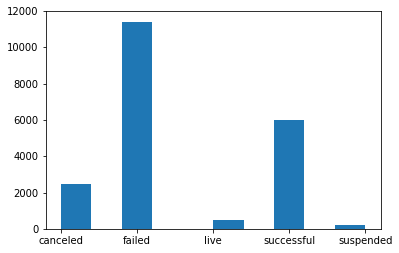

In [5]:
states = df['state']
hist1 = plt.hist(states)
plt.show()
#plot_hist(df, 'state')

Proportions of kickstarter project successes over the lifetime

Overall Success Rate:  52.715487035739315 %
years of operation:  [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


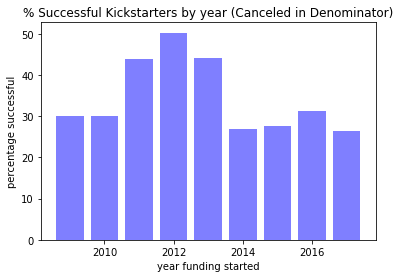

In [6]:
success = df[df['state'] == 'successful']
failed = df[df['state'] == 'failed']
prob_success = len(success)/len(failed)
print("Overall Success Rate: ",prob_success*100,"%")

#grab list of all years possible
def grab_years(df):
    years = []
    for i in df['launched_at_yr']:
        if(i not in years):
            years.append(i)
    years.sort()
    return years

print("years of operation: ",grab_years(df))

#get all rows of a certain year
def grab_year(df, year):
    return df[df.launched_at_yr.isin([year])]

def grab_state(df, state):
    return df[df['state'] == state]

#create list of success ratios for every year
def success_rate_getter(df, years):
    success_rate_by_yr = []
    for year in years:
        success = grab_year(df,year)
        failure = grab_year(df,year)
        cancel = grab_year(df,year)
        success = grab_state(success, 'successful')
        failure = grab_state(failure, 'failed')
        cancel = grab_state(cancel, 'canceled')
        year_ratio = 100*len(success)/(len(success)+len(failure)+len(cancel))
        success_rate_by_yr.append(year_ratio)
    return success_rate_by_yr
    
#create graph showing success rates by year
x = grab_years(df)
y = success_rate_getter(df,x)
plt.bar(x, y, color='b', alpha=0.5,)
plt.title('% Successful Kickstarters by year (Canceled in Denominator)')
plt.xlabel('year funding started')
plt.ylabel('percentage successful')
plt.show()

This first graph shows the success rate of kickstarter project over the years, only counting the ones that were successful, unsuccessful, or canceled as the denominator

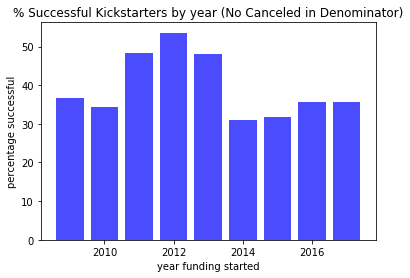

In [7]:
def success_rate_getter_no_canceled(df, years):
    success_rate_by_yr = []
    for year in years:
        success = grab_year(df,year)
        failure = grab_year(df,year)
        success = grab_state(success, 'successful')
        failure = grab_state(failure, 'failed')
        year_ratio = 100*len(success)/(len(success)+len(failure))
        success_rate_by_yr.append(year_ratio)
    return success_rate_by_yr

x = grab_years(df)
y = success_rate_getter_no_canceled(df,x)
plt.bar(x, y, color='blue', alpha=0.7,)
plt.title('% Successful Kickstarters by year (No Canceled in Denominator)')
plt.xlabel('year funding started')
plt.ylabel('percentage successful')
plt.show()

This next graph describes a similar concept as before, but without cancelled data factoring into the final calculation.  

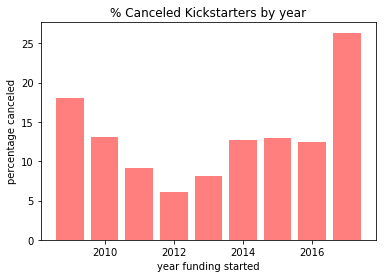

In [8]:
def canceled_rate_getter(df, years):
    cancel_rate_by_yr = []
    for year in years:
        success = grab_year(df,year)
        failure = grab_year(df,year)
        cancel = grab_year(df,year)
        success = grab_state(success, 'successful')
        failure = grab_state(failure, 'failed')
        cancel = grab_state(cancel, 'canceled')
        year_ratio = 100*len(cancel)/(len(success)+len(failure)+len(cancel))
        cancel_rate_by_yr.append(year_ratio)
    return cancel_rate_by_yr

x = grab_years(df)
y = canceled_rate_getter(df,x)
plt.bar(x, y, color='red', alpha=0.5,)
plt.title('% Canceled Kickstarters by year')
plt.xlabel('year funding started')
plt.ylabel('percentage canceled')
plt.show()

This shows the % of canceled kickstaters by year

[[30.0, 29.95169082125604, 43.85964912280702, 50.39525691699605, 44.7, 28.97018970189702, 28.12036448400085, 33.01465901848311, 26.53061224489796], [0, 0, 0, 0, 0, 0, 23.225806451612904, 26.486486486486488, 30.0], [0, 0, 0, 46.666666666666664, 44.13793103448276, 28.926701570680628, 38.684503901895205, 42.42424242424242, 15.384615384615385], [0, 0, 0, 0, 20.689655172413794, 17.98780487804878, 22.911694510739856, 26.893939393939394, 27.272727272727273], [0, 0, 0, 0, 50.0, 10.849056603773585, 20.0, 20.895522388059703, 0.0], [0, 0, 0, 0, 0, 0, 23.80952380952381, 10.81081081081081, 0], [0, 0, 0, 0, 0, 0, 13.793103448275861, 26.785714285714285, 50.0], [0, 0, 0, 0, 75.0, 19.444444444444443, 22.5, 28.0, 100.0], [0, 0, 0, 0, 0, 0, 3.658536585365854, 10.416666666666666, 50.0], [0, 0, 0, 0, 0, 11.650485436893204, 24.409448818897637, 27.38095238095238, 0.0], [0, 0, 0, 0, 0, 15.789473684210526, 19.047619047619047, 16.666666666666668, 0.0], [0, 0, 0, 0, 0, 0, 21.014492753623188, 21.568627450980394, 

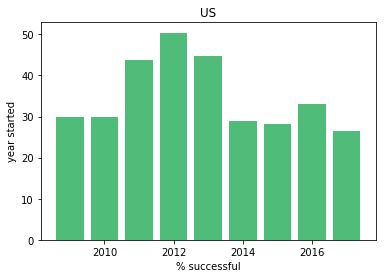

[0, 0, 0, 0, 0, 0, 23.225806451612904, 26.486486486486488, 30.0]


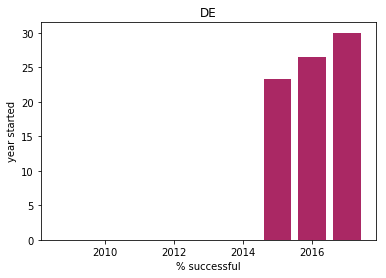

[0, 0, 0, 46.666666666666664, 44.13793103448276, 28.926701570680628, 38.684503901895205, 42.42424242424242, 15.384615384615385]


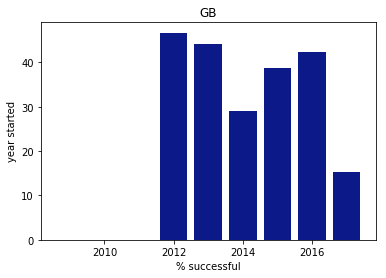

[0, 0, 0, 0, 20.689655172413794, 17.98780487804878, 22.911694510739856, 26.893939393939394, 27.272727272727273]


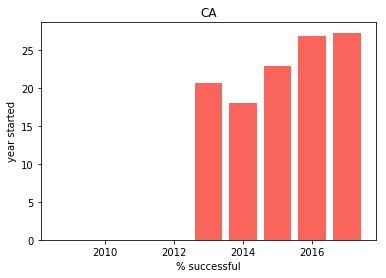

[0, 0, 0, 0, 50.0, 10.849056603773585, 20.0, 20.895522388059703, 0.0]


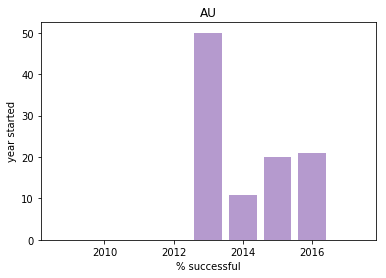

[0, 0, 0, 0, 0, 0, 23.80952380952381, 10.81081081081081, 0]


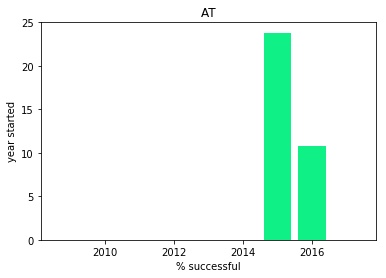

[0, 0, 0, 0, 0, 0, 13.793103448275861, 26.785714285714285, 50.0]


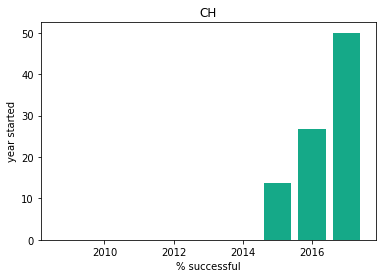

[0, 0, 0, 0, 75.0, 19.444444444444443, 22.5, 28.0, 100.0]


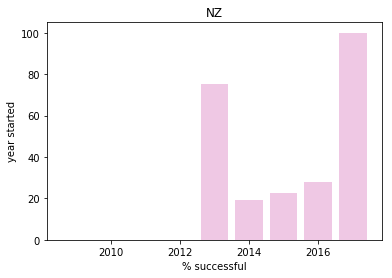

[0, 0, 0, 0, 0, 0, 3.658536585365854, 10.416666666666666, 50.0]


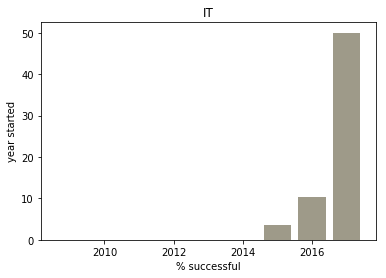

[0, 0, 0, 0, 0, 11.650485436893204, 24.409448818897637, 27.38095238095238, 0.0]


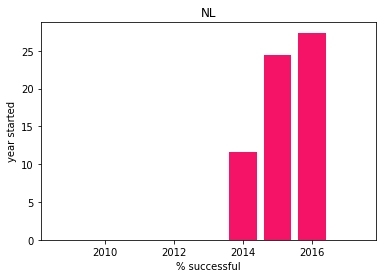

[0, 0, 0, 0, 0, 15.789473684210526, 19.047619047619047, 16.666666666666668, 0.0]


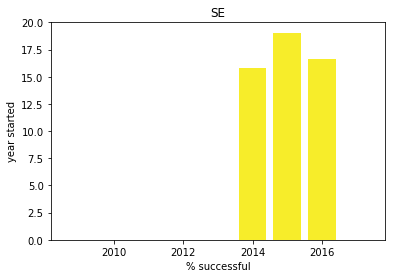

[0, 0, 0, 0, 0, 0, 21.014492753623188, 21.568627450980394, 25.0]


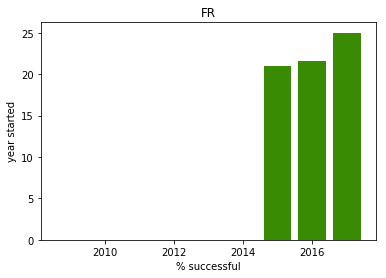

[0, 0, 0, 0, 0, 0, 0, 26.470588235294116, 33.333333333333336]


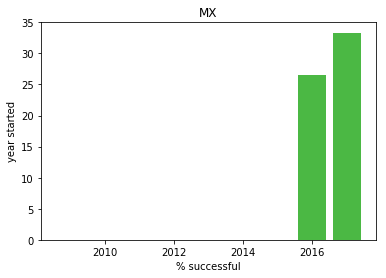

[0, 0, 0, 0, 0, 0, 9.836065573770492, 14.736842105263158, 33.333333333333336]


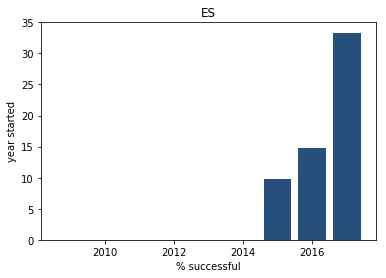

[0, 0, 0, 0, 0, 15.789473684210526, 18.46153846153846, 14.705882352941176, 0.0]


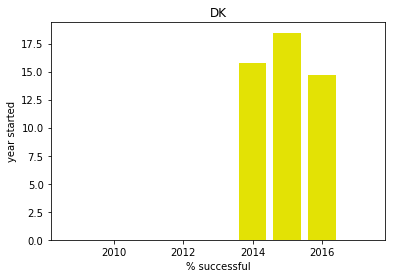

[0, 0, 0, 0, 0, 22.22222222222222, 25.714285714285715, 38.70967741935484, 0.0]


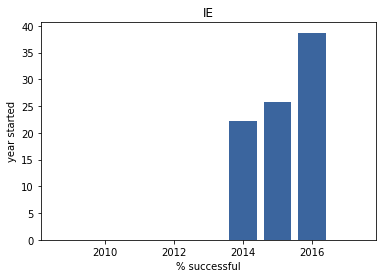

[0, 0, 0, 0, 0, 8.333333333333334, 16.666666666666668, 14.285714285714286, 0]


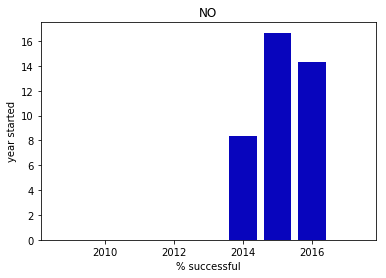

[0, 0, 0, 0, 0, 0, 5.882352941176471, 10.0, 0]


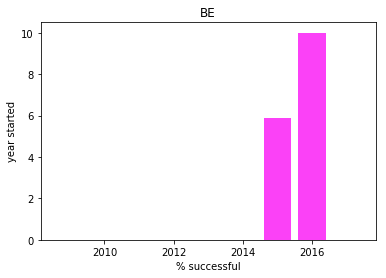

[0, 0, 0, 0, 0, 0, 100.0, 0.0, 0]


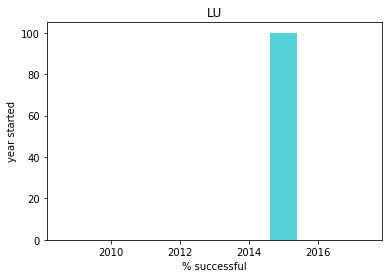

[0, 0, 0, 0, 0, 0, 0, 31.57894736842105, 0.0]


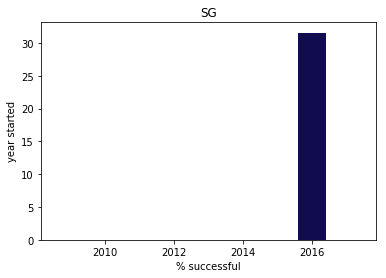

[0, 0, 0, 0, 0, 0, 0, 50.0, 50.0]


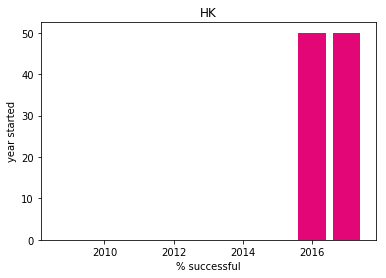

In [10]:
def grab_all_countries(df):
    countries = []
    for i in df['country']:
        if(i not in countries):
            countries.append(i)
    return countries

def grab_country(df, country):
    return df[df['country'] == country]

def success_rate_getter_countries(df, years, countries):
    success_rate_by_country = []
    for country in countries:
        success_rate_by_year_by_country = []
        for year in years:
            success = grab_year(df,year)
            failure = grab_year(df,year)
            cancel = grab_year(df,year)
            success = grab_country(success,country)
            failure = grab_country(failure,country)
            cancel = grab_country(cancel,country)
            success = grab_state(success, 'successful')
            failure = grab_state(failure, 'failed')
            cancel = grab_state(cancel, 'canceled')
            if((len(success)+len(failure)+len(cancel))==0):
                country_year_ratio = 0
            else:
                country_year_ratio = 100*len(success)/(len(success)+len(failure)+len(cancel))
            success_rate_by_year_by_country.append(country_year_ratio)
        success_rate_by_country.append(success_rate_by_year_by_country)
    print(success_rate_by_country)
    return success_rate_by_country

all_countries = grab_all_countries(df)
x = grab_years(df)
results = success_rate_getter_countries(df, x, all_countries)

for i in range(len(all_countries)):
    y = results[i]
    print(results[i])
    plt.bar(x,y,color=np.random.rand(3,))
    plt.xlabel('% successful')
    plt.ylabel('year started')
    plt.title(all_countries[i])
    plt.show()

In [11]:
df.describe()

,Unnamed: 0,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,...,state_changed_at_hr,month_created,day_of_month_created,created_at_yr,hour_of_day_launched,month_launched,day_of_month,launched_at_yr,preparation_period,duration_of_project
count,20632.000000,2.063200e+04,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20627.000000,20627.000000,20627.000000,...,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000
mean,10315.500000,1.071156e+09,9.410497e+04,2.139268e+04,183.675843,1.039363,2.091591e+04,5.940806,5.292578,18.991177,...,12.855855,6.473633,15.542652,2014.620105,12.673371,6.541828,15.322363,2014.752084,49.577598,31.169397
std,5956.089713,6.154929e+08,1.335511e+06,1.204973e+05,1222.012658,0.230419,1.154717e+05,2.826118,2.418168,4.632371,...,6.023725,3.345992,8.776659,1.273937,5.947005,3.379879,8.800871,1.261752,111.094601,14.279705
min,0.000000,1.645550e+05,1.000000e+00,0.000000e+00,0.000000,0.045641,0.000000e+00,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,5157.750000,5.472185e+08,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,4.000000,3.000000,17.000000,...,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,3.000000,28.000000
50%,10315.500000,1.069882e+09,1.400000e+04,6.950000e+02,12.000000,1.000000,7.163012e+02,6.000000,5.000000,20.000000,...,13.000000,7.000000,15.000000,2015.000000,13.000000,7.000000,15.000000,2015.000000,14.000000,30.000000
75%,15473.250000,1.601801e+09,5.000000e+04,5.954250e+03,63.000000,1.000000,6.004628e+03,8.000000,7.000000,22.000000,...,17.000000,9.000000,23.000000,2016.000000,17.000000,9.000000,23.000000,2016.000000,45.000000,35.000000
max,20631.000000,2.147388e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,...,23.000000,12.000000,31.000000,2017.000000,23.000000,12.000000,31.000000,2017.000000,1754.000000,91.000000


These histograms show the same year to year success data, but controlled by countries.  

In [12]:
successes = df[df['state'] == success]

,Unnamed: 0,id,goal,pledged,staff_pick,backers_count,static_usd_rate,usd_pledged,spotlight,name_len,...,state_changed_at_hr,month_created,day_of_month_created,created_at_yr,hour_of_day_launched,month_launched,day_of_month,launched_at_yr,preparation_period,duration_of_project
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


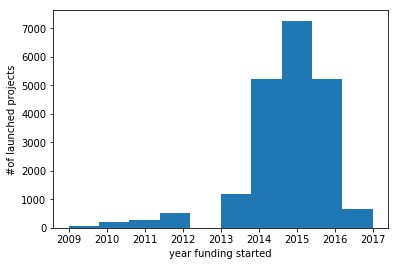

In [13]:
list_years_launched = df['launched_at_yr']
hist = plt.hist(list_years_launched)
plt.ylabel('#of launched projects')
plt.xlabel('year funding started')
plt.show()
#plot_data = pd.Series(data_hist(year_launched,df), data_hist())

This shows the distribution of projects by year

This histogram shows the growth of kickstarter over the years, the missing piece of data is simply the graph outputting teh bars with incorrect width.  